In [43]:
dataset_path = '../datasets/Basketball/'
result_dataset_path = './intermediate_datafiles/Basketball/'

# Import the relevant classes.

from Chapter2.CreateDataset import CreateDataset
from util.VisualizeDataset import VisualizeDataset
from util import util
import copy
import os
import pandas as pd
import numpy as np
from Chapter3.KalmanFilters import KalmanFilters
from Chapter3.DataTransformation import PrincipalComponentAnalysis
from Chapter3.ImputationMissingValues import ImputationMissingValues
import matplotlib.pyplot as plot
from Chapter5.Clustering import NonHierarchicalClustering
from Chapter7.PrepareDatasetForLearning import PrepareDatasetForLearning


DataViz = VisualizeDataset()
if not os.path.exists(result_dataset_path):
    print('Creating result directory: ' + result_dataset_path)
    os.makedirs(result_dataset_path)

In [ ]:
# Chapter 2: Initial exploration of the dataset.

# Set a granularity (i.e. how big are our discrete time steps). We start very
# coarse grained, namely one measurement per minute, and secondly use four measurements
# per second

granularities = [500, 250]
datasets = []

for milliseconds_per_instance in granularities:

    # Create an initial dataset object with the base directory for our data and a granularity
    DataSet = CreateDataset(dataset_path, milliseconds_per_instance)

    # Add the selected measurements to it.

    # We add the accelerometer data (continuous numerical measurements) of the phone and the smartwatch
    # and aggregate the values per timestep by averaging the values/
    DataSet.add_numerical_dataset('Accelerometer.csv', 'timestamps', ['x','y','z'], 'avg', 'acc_')
   

    DataSet.add_numerical_dataset('Gravity.csv', 'timestamps', ['x','y','z'], 'avg', 'grav_')
    DataSet.add_numerical_dataset('Gyroscope.csv', 'timestamps', ['x','y','z'], 'avg', 'gyr_')
    DataSet.add_numerical_dataset('Linear_Acceleration.csv', 'timestamps', ['x','y','z'], 'avg', 'lin_acc_')
    DataSet.add_numerical_dataset('Magnetometer.csv', 'timestamps', ['x','y','z'], 'avg', 'mag_')
  #  DataSet.add_numerical_dataset('Orientation.csv', 'timestamps', ['x','y','z'], 'avg', 'orie_')
    DataSet.add_numerical_dataset('Pressure.csv', 'timestamps', ['value1','value2'], 'avg', 'press_')
    DataSet.add_numerical_dataset('Rotation vector.csv', 'timestamps', ['xsin','ysin','zsin','cos'], 'avg', 'rot_vec_')
    DataSet.add_numerical_dataset('Step_Counter.csv', 'timestamps', ['step'], 'avg', 'step_')
    
    
    DataSet.add_event_dataset('labels.csv', 'label_start', 'label_end', 'label', 'binary')

   
    # Get the resulting pandas data table

    dataset = DataSet.data_table

    # Plot the data


    # Boxplot
    DataViz.plot_dataset_boxplot(dataset, ['acc_x','acc_y','acc_z'])

    # Plot all data
   # DataViz.plot_dataset(dataset, ['acc_', 'grav_','gyr_','lin_acc_','mag_', 'orie_','press_','rot_vec_','step_', 'label'], ['like', 'like','like'], ['line', 'line', 'line', 'line', 'line', 'line', 'points', 'points'])
    DataViz.plot_dataset(dataset, ['acc_', 'grav_','gyr_','lin_acc_','mag_','press_','rot_vec_','step_', 'label'], ['like', 'like','like','like', 'like','like','like', 'like','like'], ['line', 'line', 'line', 'line', 'line', 'line','line', 'points', 'points'],'basketball.png')

    # And print a summary of the dataset

    util.print_statistics(dataset)
    datasets.append(copy.deepcopy(dataset))

# And print the table that has been included in the book

util.print_latex_table_statistics_two_datasets(datasets[0], datasets[1])

# Finally, store the last dataset we have generated (250 ms).
dataset.to_csv(result_dataset_path + 'chapter2_result.csv')


In [ ]:
dataset.isnull().sum()

In [ ]:
#get values 
dataset2 = dataset.loc[~dataset['lin_acc_x'].isnull()]

In [ ]:
dataset2.to_csv(result_dataset_path + 'chapter2_result_dataset2.csv')
dataset2.isnull().sum()

In [ ]:
DataViz.plot_dataset(dataset2, ['acc_', 'grav_','gyr_','lin_acc_','mag_','press_','rot_vec_','step_', 'label'], ['like', 'like','like','like', 'like','like','like', 'like','like'], ['line', 'line', 'line', 'line', 'line', 'line','line', 'points', 'points'],'basketball.png')

In [ ]:
try:
    dataset3 = pd.read_csv(result_dataset_path + 'chapter2_result_dataset2.csv', index_col=0)
except IOError as e:
    print('File not found, try to run previous crowdsignals scripts first!')
    raise e

In [ ]:
dataset3['acc_z'].plot()

In [ ]:
dataset3

In [ ]:
dataset3 = dataset3.reset_index()

In [ ]:
dataset = dataset.reset_index()

In [ ]:
for index, time in enumerate(dataset3['index']):
    dataset3['index'][index] = dataset['index'][270 + index]

In [ ]:
dataset3.to_csv(result_dataset_path + 'chapter2_result_dataset3.csv')

In [ ]:
dataset3 = dataset3.set_index('index')

In [ ]:
dataset3.info()

In [2]:
try:
    dataset3 = pd.read_csv(result_dataset_path + 'chapter2_result_dataset3.csv', index_col=0)
except IOError as e:
    print('File not found, try to run previous crowdsignals scripts first!')
    raise e

In [8]:
MisVal = ImputationMissingValues()
for col in [c for c in dataset3.columns if (not ('label' in c)) ]:
    dataset4 = MisVal.impute_interpolate(dataset3, col)

In [ ]:
# Let us try the Kalman filter to impute missing data


selected_predictor_cols = [c for c in dataset3.columns if (not ('label' in c)) ]

dataset3.index = dataset3.index.to_datetime()
KalFilter = KalmanFilters()
for col in selected_predictor_cols:
    dataset4 = KalFilter.apply_kalman_filter(dataset3, col,True)
    
DataViz.plot_imputed_values(dataset4, ['original', 'kalman'], 'acc_x', dataset4['acc_x'])
DataViz.plot_dataset(dataset4, ['acc_x', 'acc_x'], ['exact','exact'], ['line', 'line'])

In [23]:
DataViz.plot_imputed_values(dataset4, ['original', 'kalman'], 'acc_x', dataset4['acc_x'])
DataViz.plot_dataset(dataset4, ['acc_x', 'acc_x'], ['exact','exact'], ['line', 'line'])

ValueError: invalid literal for float(): 2018-06-22 08:54:35.952

Error in callback <function post_execute at 0x0000000008AADBA8> (for post_execute):


ValueError: DateFormatter found a value of x=0, which is an illegal date.  This usually occurs because you have not informed the axis that it is plotting dates, e.g., with ax.xaxis_date()

ValueError: DateFormatter found a value of x=0, which is an illegal date.  This usually occurs because you have not informed the axis that it is plotting dates, e.g., with ax.xaxis_date()

In [40]:
selected_predictor_cols = [c for c in dataset4.columns if (not ('label' in c)) ]
selected_predictor_cols

['acc_x',
 'acc_y',
 'acc_z',
 'grav_x',
 'grav_y',
 'grav_z',
 'gyr_x',
 'gyr_y',
 'gyr_z',
 'lin_acc_x',
 'lin_acc_y',
 'lin_acc_z',
 'mag_x',
 'mag_y',
 'mag_z',
 'press_value1',
 'press_value2',
 'rot_vec_xsin',
 'rot_vec_ysin',
 'rot_vec_zsin',
 'rot_vec_cos',
 'step_step']

In [13]:

# Determine the PC's for all but our target columns (the labels and the heart rate)
# We simplify by ignoring both, we could also ignore one first, and apply a PC to the remainder.
selected_predictor_cols = [c for c in dataset4.columns if (not ('label' in c)) ]
selected_predictor_cols = ['acc_x', 'acc_y', 'acc_z', 'grav_x', 'grav_y', 'grav_z', 'gyr_x', 'gyr_y', 'gyr_z',
 'lin_acc_x', 'lin_acc_y', 'lin_acc_z', 'mag_x', 'mag_y', 'mag_z', 'press_value1', 'press_value2', 'step_step']
PCA = PrincipalComponentAnalysis()
pc_values = PCA.determine_pc_explained_variance(dataset4, selected_predictor_cols)


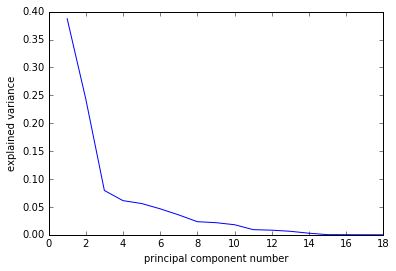

In [16]:

# Plot the variance explained.

plot.plot(range(1, len(selected_predictor_cols)+1), pc_values, 'b-')
plot.xlabel('principal component number')
plot.ylabel('explained variance')
plot.show(block=False)


In [20]:

# We select 7 as the best number of PC's as this explains most of the variance

n_pcs = 5

dataset5 = PCA.apply_pca(copy.deepcopy(dataset4), selected_predictor_cols, n_pcs)

#And we visualize the result of the PC's

DataViz.plot_dataset(dataset5, ['pca_', 'label'], ['like', 'like'], ['line', 'points'])


ValueError: invalid literal for float(): 2018-06-22 08:54:35.952

Error in callback <function post_execute at 0x0000000008AADBA8> (for post_execute):


ValueError: DateFormatter found a value of x=0, which is an illegal date.  This usually occurs because you have not informed the axis that it is plotting dates, e.g., with ax.xaxis_date()

ValueError: DateFormatter found a value of x=0, which is an illegal date.  This usually occurs because you have not informed the axis that it is plotting dates, e.g., with ax.xaxis_date()

 ===== kmeans clustering =====
k =  2
silhouette =  0.521096819211
k =  3
silhouette =  0.297408846314
k =  4
silhouette =  0.320230679302
k =  5
silhouette =  0.315462598343
k =  6
silhouette =  0.329187817956
k =  7
silhouette =  0.352288290865
k =  8
silhouette =  0.356278083135
k =  9
silhouette =  0.374134844586


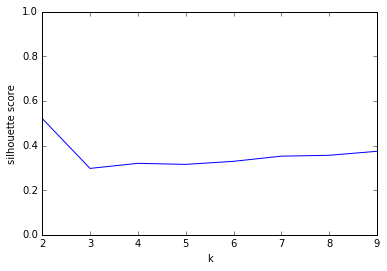

In [36]:
##Chapter 5

# First let us use non hierarchical clustering.

clusteringNH = NonHierarchicalClustering()

# Let us look at k-means first.

k_values = range(2, 10)
silhouette_values = []
#
## Do some initial runs to determine the right number for k
#
print '===== kmeans clustering ====='
for k in k_values:
    print 'k = ', k
    dataset_cluster = clusteringNH.k_means_over_instances(copy.deepcopy(dataset5), ['acc_x', 'acc_y', 'acc_z'], k, 'default', 20, 10)
    silhouette_score = dataset_cluster['silhouette'].mean()
    print 'silhouette = ', silhouette_score
    silhouette_values.append(silhouette_score)

plot.plot(k_values, silhouette_values, 'b-')
plot.xlabel('k')
plot.ylabel('silhouette score')
plot.ylim([0,1])
plot.show()


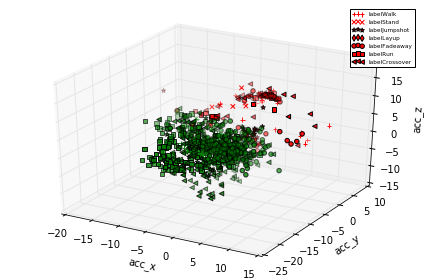

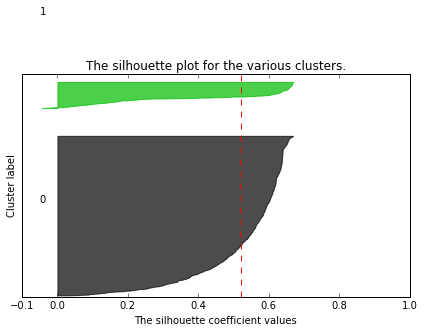

\multirow{2}{*}{ acc_x } & mean   &  -0.56  &  -1.97 \\
 & std   &  4.24  &  3.61 \\
\multirow{2}{*}{ acc_y } & mean   &  1.80  &  -10.43 \\
 & std   &  3.75  &  3.37 \\
\multirow{2}{*}{ acc_z } & mean   &  6.48  &  0.57 \\
 & std   &  3.56  &  2.79 \\
labelWalk  & percentage   &  11.03 \%  &  88.97 \% \\
labelStand  & percentage   &  12.50 \%  &  87.50 \% \\
labelJumpshot  & percentage   &  13.81 \%  &  86.19 \% \\
labelLayup  & percentage   & 

ZeroDivisionError: float division by zero

In [37]:
# And run the knn with the highest silhouette score

k = 2

dataset_knn = clusteringNH.k_means_over_instances(copy.deepcopy(dataset), ['acc_x', 'acc_y', 'acc_z'], k, 'default', 50, 50)
DataViz.plot_clusters_3d(dataset_knn, ['acc_x', 'acc_y', 'acc_z'], 'cluster', ['label'])
DataViz.plot_silhouette(dataset_knn, 'cluster', 'silhouette')
util.print_latex_statistics_clusters(dataset_knn, 'cluster', ['acc_x', 'acc_y', 'acc_z'], 'label')
del dataset_knn['silhouette']

In [38]:
dataset_knn.to_csv(dataset_path + 'chapter5_result.csv')

In [44]:

try:
    dataset = pd.read_csv(dataset_path + 'chapter5_result.csv', index_col=0)
except IOError as e:
    print('File not found, try to run previous crowdsignals scripts first!')

dataset.index = dataset.index.to_datetime()

# Let us consider our first task, namely the prediction of the label. We consider this as a non-temporal task.

# We create a single column with the categorical attribute representing our class. Furthermore, we use 70% of our data
# for training and the remaining 30% as an independent test set. We select the sets based on stratified sampling. We remove
# cases where we do not know the label.

prepare = PrepareDatasetForLearning()

train_X, test_X, train_y, test_y = prepare.split_single_dataset_classification(dataset, ['label'], 'like', 0.7, filter=True, temporal=False)
#train_X, test_X, train_y, test_y = prepare.split_single_dataset_classification(dataset, ['label'], 'like', 0.01, filter=True, temporal=False)

print 'Training set length is: ', len(train_X.index)
print 'Test set length is: ', len(test_X.index)

# Select subsets of the features that we will consider:

basic_features =['acc_x', 'acc_y', 'acc_z', 'grav_x', 'grav_y', 'grav_z', 'gyr_x', 'gyr_y', 'gyr_z',
 'lin_acc_x', 'lin_acc_y', 'lin_acc_z', 'mag_x', 'mag_y', 'mag_z', 'press_value1', 'press_value2', 'step_step']
pca_features = ['pca_1','pca_2','pca_3','pca_4','pca_5']
time_features = [name for name in dataset.columns if '_temp_' in name]
freq_features = [name for name in dataset.columns if (('_freq' in name) or ('_pse' in name))]
print '#basic features: ', len(basic_features)
print '#PCA features: ', len(pca_features)
print '#time features: ', len(time_features)
print '#frequency features: ', len(freq_features)
cluster_features = ['cluster']
print '#cluster features: ', len(cluster_features)
features_after_chapter_3 = list(set().union(basic_features, pca_features))
features_after_chapter_4 = list(set().union(basic_features, pca_features, time_features, freq_features))
features_after_chapter_5 = list(set().union(basic_features, pca_features, time_features, freq_features, cluster_features))


# First, let us consider the performance over a selection of features:

fs = FeatureSelectionClassification()

features, ordered_features, ordered_scores = fs.forward_selection(50, train_X[features_after_chapter_5], train_y)
print ordered_scores
print ordered_features

plot.plot(range(1, 51), ordered_scores)
plot.xlabel('number of features')
plot.ylabel('accuracy')
plot.show()


C:\Users\zdujmic\AppData\Local\Continuum\Anaconda2\envs\ml4qs\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  import sys


ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1338 entries, 2018-06-22 08:49:01.702000 to 2018-06-22 08:54:35.952000
Data columns (total 37 columns):
acc_x             1338 non-null float64
acc_y             1338 non-null float64
acc_z             1338 non-null float64
grav_x            1338 non-null float64
grav_y            1338 non-null float64
grav_z            1338 non-null float64
gyr_x             1338 non-null float64
gyr_y             1338 non-null float64
gyr_z             1338 non-null float64
lin_acc_x         1338 non-null float64
lin_acc_y         1338 non-null float64
lin_acc_z         1338 non-null float64
mag_x             1338 non-null float64
mag_y             1338 non-null float64
mag_z             1338 non-null float64
press_value1      1338 non-null float64
press_value2      1338 non-null float64
rot_vec_xsin      0 non-null float64
rot_vec_ysin      0 non-null float64
rot_vec_zsin      0 non-null float64
rot_vec_cos       0 non-null float64
step_step      